In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})


    1. User Growth Rate
    2. Churn Rate And Retention Rate 
    3. Daily Active User (DAU)
    4. Monthly Active User (MAU)
    5. Most popular products sold (Top-10)
    6. Products with the highest income (Top-10)
    7. Revenue amount

In [2]:
logs = pd.read_csv('data/login_logs.csv', parse_dates=['login_time'])
items = pd.read_csv('data/sales_orders_items.csv')

logs['login_time'] = pd.to_datetime(logs['login_time'].dt.date)

In [3]:
logs.sort_values(by='login_time')

,login_log_id,user_id,login_time
0,1385328,99160,2021-07-01
4972,1390300,100348,2021-07-01
4971,1390299,43108,2021-07-01
4970,1390298,91444,2021-07-01
4969,1390297,99292,2021-07-01
...,...,...,...
658214,4662371,219392,2022-07-30
658215,4662372,33752,2022-07-30
658216,4662373,224824,2022-07-30
658207,4662364,225596,2022-07-30


In [4]:
items

,order_item_id,fk_product_id,fk_order_id,ordered_quantity,order_quantity_accepted,rate
0,62609,7818,119874,1,0,4993.00
1,62610,7607,119877,1,0,6203.40
2,62611,9916,119880,2,2,2904.41
3,62612,11118,119880,2,2,2205.00
4,62613,12702,119880,2,2,2200.85
...,...,...,...,...,...,...
20483,157584,10975,318966,1,1,12632.00
20484,157585,10975,318966,1,0,11814.00
20485,157586,10975,318966,1,1,10110.00
20486,157587,3284,318969,1,0,5271.00


### 1.User Growth Rate
(users at the of end the period - users at the beginning of the period) / users at the beginning of the period * 100

In [5]:
def ugr(data,date_col, unique_counter):
    ugr = pd.DataFrame({'day': [], 'first_date':[],'next_days':[]})
    for d in data[date_col].unique():
        ug = pd.DataFrame({'day': [d],
                            'first_date':[len(data.loc[data[date_col] == data[date_col].sort_values()[0], unique_counter].unique())],
                            'next_days':[len(data.loc[data[date_col] <= d, unique_counter].unique())]})
        ugr = pd.concat([ugr, ug], axis=0)
    ugr['daily_ugr'] = (ugr.next_days - ugr.first_date) / ugr.first_date * 100
    ugr.reset_index(inplace=True, drop=True)
    return ugr

In [6]:
daily_ugr = ugr(data=logs, date_col='login_time', unique_counter='user_id')

In [7]:
print('User Growth Rate:', list(daily_ugr.daily_ugr)[-1],'%')

User Growth Rate: 1197.6327575175944 %


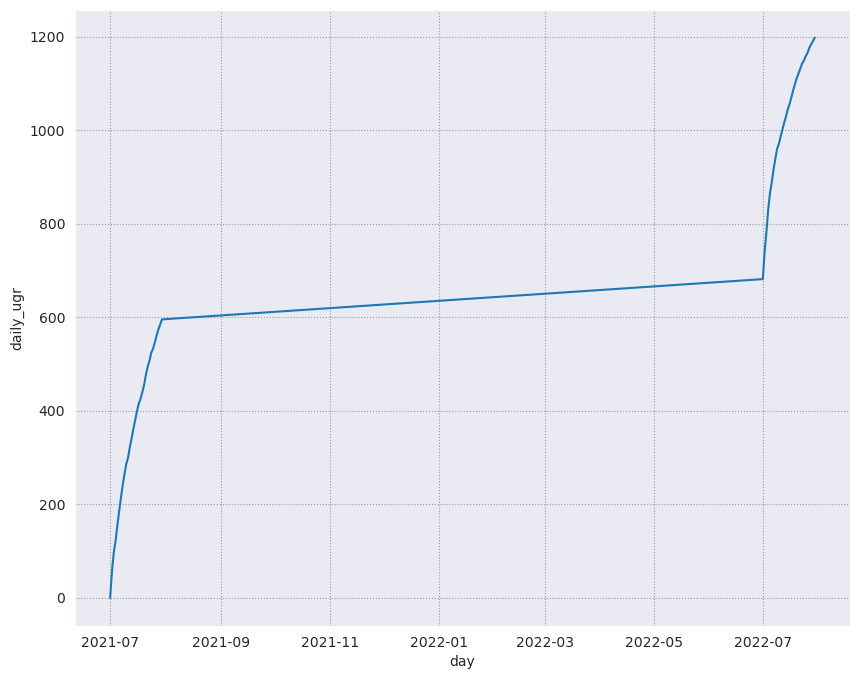

In [8]:
fig = plt.figure(figsize=(10,8))
sns.lineplot(data=daily_ugr, x='day', y='daily_ugr');

In [9]:
daily_ugr

,day,first_date,next_days,daily_ugr
0,2021-07-01,1563.0,1563.0,0.000000
1,2021-07-02,1563.0,2422.0,54.958413
2,2021-07-03,1563.0,3062.0,95.905310
3,2021-07-04,1563.0,3446.0,120.473448
4,2021-07-05,1563.0,3959.0,153.294946
5,2021-07-06,1563.0,4442.0,184.197057
6,2021-07-07,1563.0,4885.0,212.539987
7,2021-07-08,1563.0,5319.0,240.307102
8,2021-07-09,1563.0,5677.0,263.211772
9,2021-07-10,1563.0,6029.0,285.732566


### 2. Churn Rate And Retention Rate 
Loging in 30 days

#### Churn Rate

In [10]:
def churn_rate(data, event_date, count_by, churn_days):
    """
    Count Churn Rate
    data(DataFrame): add a df
    event_date(column name): column with start dates
    count_by(column name): unique ids
    churn_days(integer): after the day ids will be counted as churned
    """
    df_copy = data.copy()
    df_copy['next_day'] = df_copy.groupby([count_by])[event_date].shift(-1)
    df_copy['next_login_days'] = (df_copy['next_day'] - df_copy[event_date]) / np.timedelta64(1, 'D')
    df_copy['churned'] = df_copy.next_login_days.apply(lambda x: 0 if x < churn_days else 1)
    max_date = df_copy.login_time.max() - datetime.timedelta(days=churn_days)
    churn_rate = df_copy.loc[df_copy[event_date] <= max_date]\
                               .groupby([event_date], as_index=False)\
                               .agg({'churned' : 'sum', count_by : 'nunique'})

    churn_rate.columns = [event_date,'churned', 'dau']
    churn_rate['churn_rate'] = churn_rate['churned'] / churn_rate['dau'] *100
    return churn_rate

In [11]:
churn_df = churn_rate(data=logs,event_date='login_time',count_by='user_id', churn_days=30)

In [12]:
churn_df

,login_time,churned,dau,churn_rate
0,2021-07-01,180,1563,11.516315
1,2021-07-02,181,1519,11.915734
2,2021-07-03,196,1485,13.198653
3,2021-07-04,133,1128,11.790780
4,2021-07-05,190,1536,12.369792
5,2021-07-06,205,1507,13.603185
6,2021-07-07,191,1526,12.516383
7,2021-07-08,225,1586,14.186633
8,2021-07-09,197,1561,12.620115
9,2021-07-10,215,1551,13.862025


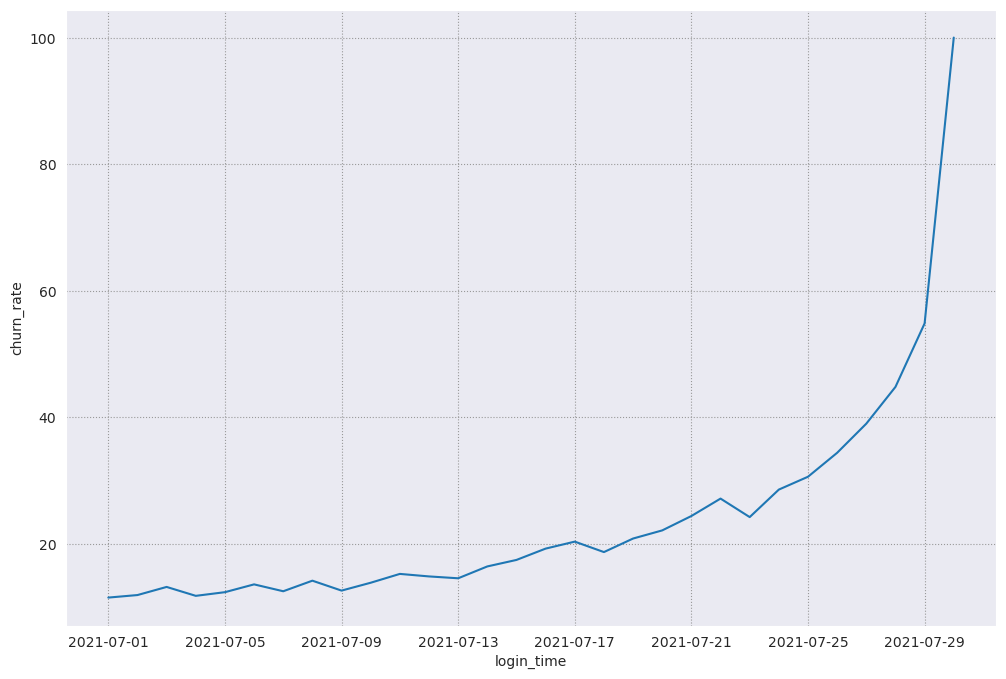

In [13]:
fig = plt.figure(figsize=(12,8))
sns.lineplot(churn_df,x='login_time', y='churn_rate');

#### Retention Rate

In [14]:
def retention_by_days(data,begin,event_date, count_by):
    df_copy = data.copy()
    data_begin = df_copy.loc[df_copy[event_date] == begin, count_by].unique()
    df_copy['visit'] = df_copy[count_by].apply(lambda x: 1 if x in data_begin else 0)
    retention = df_copy[df_copy['visit'] == 1]\
                .groupby([event_date], as_index=False)\
                .agg({count_by: pd.Series.nunique})
    retention['retention_rate'] = retention[count_by] / retention[count_by][0] * 100
    return retention

In [15]:
retention = retention_by_days(data=logs,begin='2021-07-01',event_date='login_time', count_by='user_id')
retention

,login_time,user_id,retention_rate
0,2021-07-01,1563,100.000000
1,2021-07-02,660,42.226488
2,2021-07-03,596,38.131798
3,2021-07-04,475,30.390275
4,2021-07-05,612,39.155470
5,2021-07-06,539,34.484965
6,2021-07-07,528,33.781190
7,2021-07-08,523,33.461292
8,2021-07-09,521,33.333333
9,2021-07-10,517,33.077415


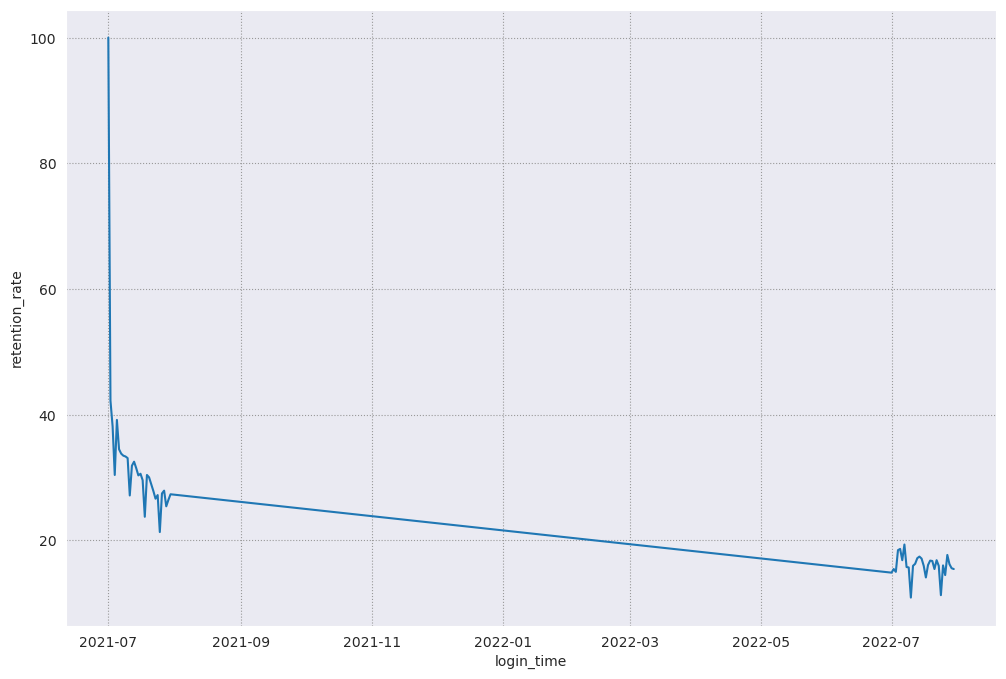

In [16]:
fig = plt.figure(figsize=(12,8))
sns.lineplot(retention,x='login_time', y='retention_rate');

### 3. Daily Active User (DAU)

In [17]:
DAU = logs.groupby(['login_time'], as_index=False)\
    .agg({'user_id': pd.Series.nunique})
DAU

,login_time,user_id
0,2021-07-01,1563
1,2021-07-02,1519
2,2021-07-03,1485
3,2021-07-04,1128
4,2021-07-05,1536
5,2021-07-06,1507
6,2021-07-07,1526
7,2021-07-08,1586
8,2021-07-09,1561
9,2021-07-10,1551


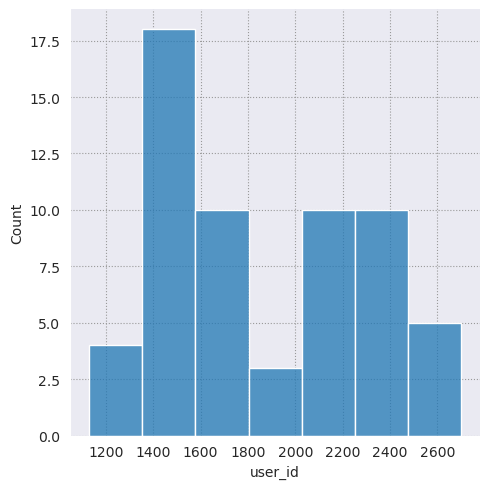

In [18]:
sns.displot(DAU,x='user_id');

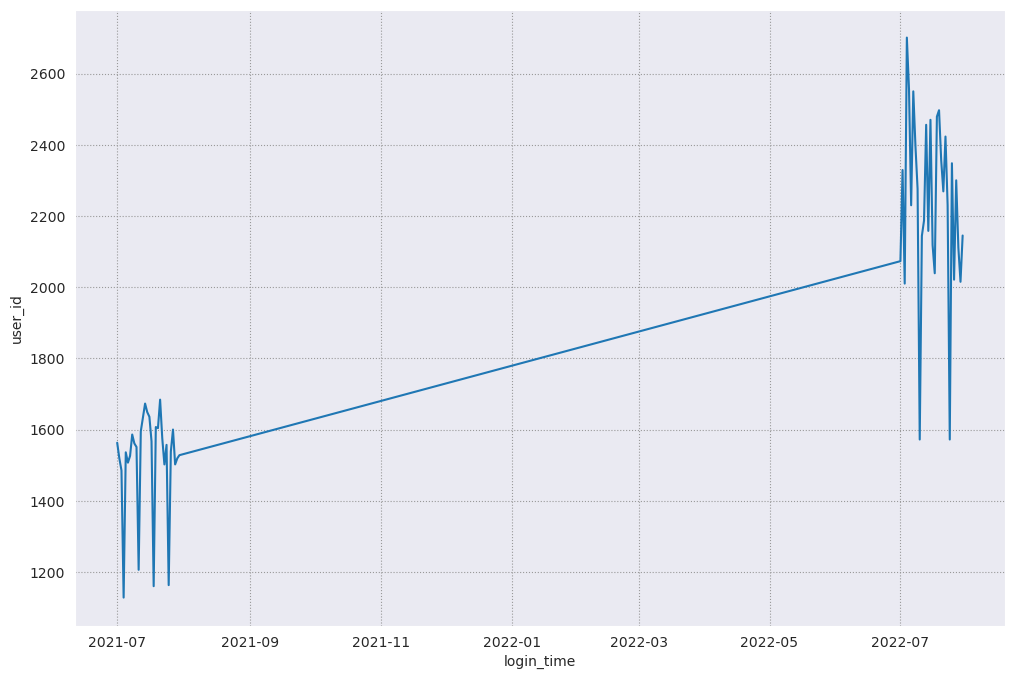

In [19]:
fig = plt.figure(figsize=(12,8))
sns.lineplot(DAU,x='login_time', y='user_id');

### 4. Monthly Active User (MAU)

In [20]:
MAU = logs.groupby([logs['login_time'].dt.year, logs['login_time'].dt.month])\
    .agg({'user_id': pd.Series.nunique})
MAU.reset_index(allow_duplicates=True, inplace=True)
MAU.columns = ['years', 'months', 'user_id']

In [21]:
MAU

,years,months,user_id
0,2021,7,10867
1,2022,7,13022


### 5. Most popular products sold (Top-10) and 6. Products with the highest income (Top-10)

In [22]:
items['amount'] = items['rate'] * items['order_quantity_accepted']

In [23]:
product_sold = items.groupby(['fk_product_id'], as_index=False)\
                                .agg({'order_quantity_accepted': 'sum',
                                      'amount': 'sum'})

In [24]:
product_sold.sort_values(by='order_quantity_accepted', ascending=False).head(10)

,fk_product_id,order_quantity_accepted,amount
445,10235,1617,2238276.45
610,12547,1572,9716031.00
227,8219,1478,20501461.30
312,8444,1410,8370628.40
300,8428,1149,1901411.80
228,8221,1091,4220229.74
45,3610,936,11240647.00
614,12652,886,6514825.60
223,8210,652,8645730.50
120,7640,608,9204147.60


In [25]:
product_sold.sort_values(by='amount', ascending=False).head(10)

,fk_product_id,order_quantity_accepted,amount
227,8219,1478,20501461.30
45,3610,936,11240647.00
610,12547,1572,9716031.00
120,7640,608,9204147.60
223,8210,652,8645730.50
312,8444,1410,8370628.40
614,12652,886,6514825.60
478,10975,434,5591222.30
228,8221,1091,4220229.74
6,1038,467,3566049.12


### 7. Revenue amount

In [26]:
print('Revenue amount:', items.amount.sum())

Revenue amount: 177174149.409
